<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [2]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=25).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

plt.rcParams["figure.dpi"] = 200

## 3.1	넘파이로 무작위의 동전 뒤집기와 주사위 던지기를 시뮬레이션 하기(Simulating random coin flips and die rolls using NumPy)

In [3]:
import numpy as np

In [4]:
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [5]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

In [6]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"동전은 {'앞면' if coin_flip == 1 else '뒷면'} 으로 떨어졌습니다.")

동전은 뒷면 으로 떨어졌습니다.


In [7]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
  total_heads = len([head for head in coin_flip_sequence if head == 1])
  return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"동전 앞면이 관측된 빈도는 {freq_heads} 입니다")


동전 앞면이 관측된 빈도는 0.8 입니다


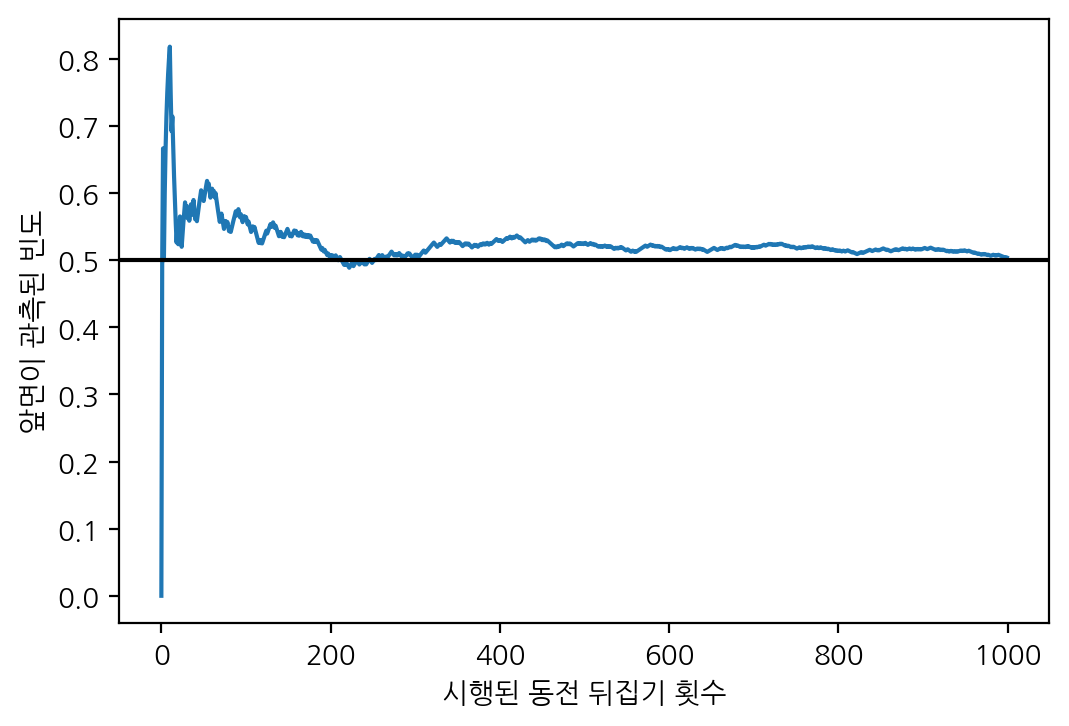

In [8]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
  coin_flips.append(np.random.randint(0, 2))
  frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('시행된 동전 뒤집기 횟수')
plt.ylabel('앞면이 관측된 빈도')
plt.show()

### 3.1.1.	편향된 동전 뒤집기의 분석(Analyzing biased coin flips)

In [12]:
np.random.seed(0)
print("동전을 한 번 뒤집어봅니다.")
coin_flip = np.random.binomial(1, 0.7)
print(f"편향된 동전은 {'앞면' if coin_flip == 1 else '뒷면'}으로 떨어졌습니다.")

print("\n동전을 열 번 뒤집어봅니다.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{number_coin_flips}번의 편향된 동전 뒤집기 중 앞면은 \
{head_count}번 관측되었습니다."))

동전을 한 번 뒤집어봅니다.
편향된 동전은 앞면으로 떨어졌습니다.

동전을 열 번 뒤집어봅니다.
10번의 편향된 동전 뒤집기 중 앞면은 6번 관측되었습니다.


In [13]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"동전의 앞면이 관측된 빈도는 {frequency} 입니다")

동전의 앞면이 관측된 빈도는 0.697 입니다


In [14]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
  head_count = np.random.binomial(1000, 0.7)
  frequency = head_count / 1000
  print(f"{i} 번째 반복에서의 빈도는 {frequency} 입니다")
  if frequency == 0.7:
    print("빈도와 실제 확률이 일치합니다!\n")


1 번째 반복에서의 빈도는 0.69 입니다
2 번째 반복에서의 빈도는 0.7 입니다
빈도와 실제 확률이 일치합니다!

3 번째 반복에서의 빈도는 0.707 입니다
4 번째 반복에서의 빈도는 0.702 입니다
5 번째 반복에서의 빈도는 0.699 입니다


## 3.2	히스토그램과 넘파이 배열로 계산하는 신뢰 구간(Computing confidence intervals using histograms and NumPy arrays) 